## Import module

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

## Load data

In [12]:
#iris
data = load_iris()

X_train ,X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3,random_state=42)

## GaussianNB

In [13]:
clf = GaussianNB().fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("The score of the GaussianNB:"+str(score))
metrics.confusion_matrix(y_test,y_pred)

The score of the GaussianNB:0.9777777777777777


array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

## MultinomialNB

In [15]:
clf = MultinomialNB().fit(X_train,y_train)

In [16]:
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("The score of the MultinomialNB:"+str(score))
metrics.confusion_matrix(y_test,y_pred)

The score of the MultinomialNB:0.9555555555555556


array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]], dtype=int64)

## BernoulliNB

In [17]:
clf = make_pipeline(StandardScaler(),BernoulliNB()).fit(X_train, y_train)
#clf = BernoulliNB().fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("The score of the BernoulliNB:"+str(score))
metrics.confusion_matrix(y_test,y_pred)

The score of the BernoulliNB:0.28888888888888886


array([[ 0, 19,  0],
       [ 0, 13,  0],
       [ 0, 13,  0]], dtype=int64)

## Visualization

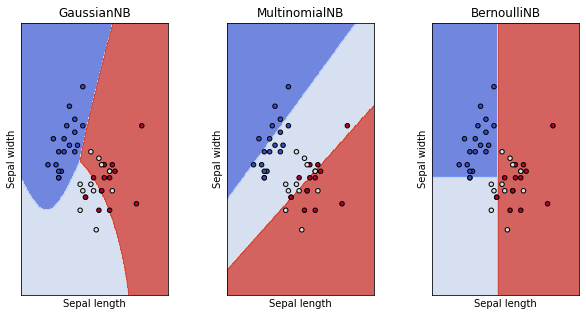

In [24]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    GaussianNB(),
    MultinomialNB(),
    make_pipeline(StandardScaler(),BernoulliNB())
)
models = (clf.fit(X_train[:, :2], y_train) for clf in models)

# title for the plots
titles = (
    "GaussianNB",
    "MultinomialNB",
    "BernoulliNB",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()